In [39]:
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from numpy.fft import fftshift
from scipy.fft import fft
from scipy.io.wavfile import write

from libs.audio import db_amp_change, write_audio, load_mat_file
from libs.path import get_output_resources_path, get_resources_path

# Задание 1a

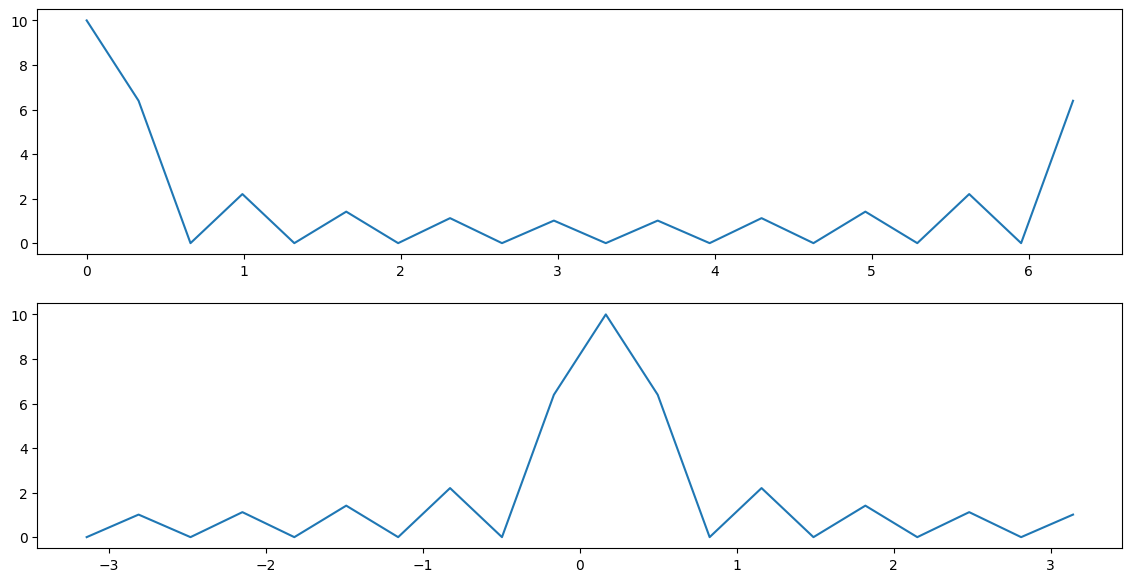

In [40]:
def u(n):
    return 1 if n >= 0 else 0
vu = np.vectorize(u)

n = 20
xn = np.arange(0, n)
x = vu(xn) - vu(xn - 10)
y = fft(x)
w = np.linspace(0, 2 * np.pi, n)
y1 = fftshift(y)
w1 = np.linspace(-np.pi, np.pi, n)
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=1)
axes[0].plot(w, np.abs(y))
axes[1].plot(w1, np.abs(y1));

# Задание 1b

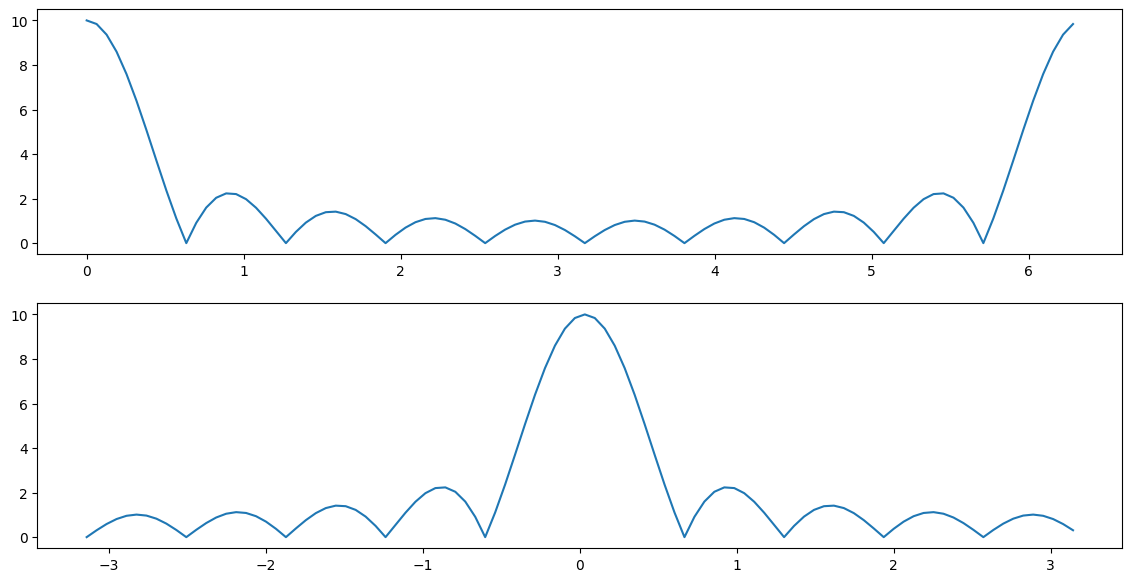

In [41]:
n = 100
xn = np.arange(0, n)
x = vu(xn) - vu(xn - 10)
y = fft(x)
w = np.linspace(0, 2 * np.pi, n)
y1 = fftshift(y)
w1 = np.linspace(-np.pi, np.pi, n)
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=1)
axes[0].plot(w, np.abs(y))
axes[1].plot(w1, np.abs(y1));

# Задание 2a

[ 0.00000000e+00  1.51522021e+00  1.87953491e+00  8.95980019e-01
 -5.65541972e-01 -1.36680421e+00 -1.06242623e+00 -1.66025481e-01
  4.53726534e-01  4.11624952e-01  7.12347101e-02  3.42946409e-02
  4.25385021e-01  7.27756569e-01  3.50282665e-01 -6.54477690e-01
 -1.48607725e+00 -1.28315907e+00  1.76403525e-02  1.49192044e+00
  1.95355682e+00  9.79683377e-01 -6.93232471e-01 -1.77776778e+00
 -1.51320201e+00 -2.56259164e-01  9.12867128e-01  1.16502132e+00
  5.72190823e-01 -1.18455152e-01 -2.91212803e-01 -2.96757788e-02
  8.81130043e-02 -2.91803641e-01 -8.39006995e-01 -8.38982463e-01
  2.60359408e-02  1.21314025e+00  1.69672238e+00  8.96766923e-01
 -7.06167065e-01 -1.88908200e+00 -1.70368813e+00 -2.93825715e-01
  1.22566563e+00  1.72073616e+00  9.65412039e-01 -2.65602763e-01
 -9.65884176e-01 -7.76526067e-01 -1.74449145e-01  1.33101034e-01
 -4.75162387e-02 -2.61054592e-01  1.85705279e-02  7.22594809e-01
  1.15376282e+00  6.66806456e-01 -5.96185812e-01 -1.67979409e+00
 -1.60471522e+00 -2.78062

/Users/graywa1cher/study/multimedia-tasks-github/libs/audio.py:84: RuntimeWarning: divide by zero encountered in log10
  return 20 * np.log10(np.abs(ratio_data))


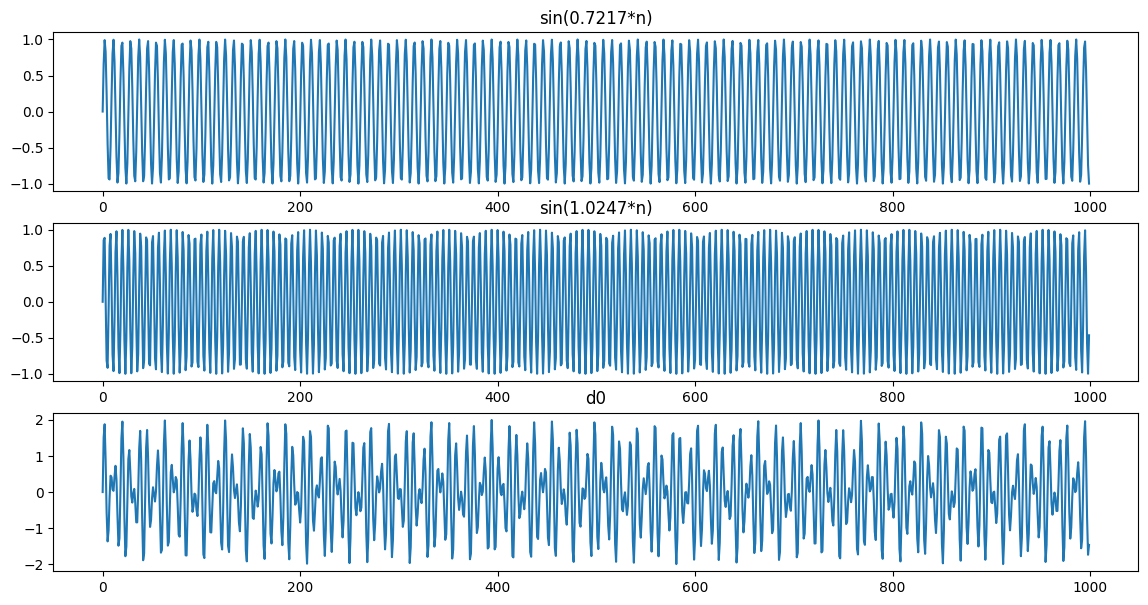

In [42]:
wr = [0.7217, 0.5346, 0.5346, 0.5346, 0.5906, 0.5906, 0.5906, 0.6535, 0.6535, 0.6535]
wc = [1.0247, 0.9273, 1.0247, 1.1328, 0.9273, 1.0247, 1.1328, 0.9273, 1.0247, 1.1328]
sampling_frequency = 8192
n = 1000
d = list()
for i in range(0, 10):
    xn = np.arange(n)
    s1 = np.sin(wr[i] * xn)
    s2 = np.sin(wc[i] * xn)
    x = s1 + s2
    if i == 0:
        fig = plt.figure()
        axes = fig.subplots(nrows=3, ncols=1)
        axes[0].plot(xn[:n], s1[:n])
        axes[0].set_title(f'sin({wr[i]}*n)')
        axes[1].plot(xn[:n], s2[:n])
        axes[1].set_title(f'sin({wc[i]}*n)')
        axes[2].plot(xn[:n], x[:n])
        axes[2].set_title('d0')
    d.append(x)
    # x_t
    if i == 0:
        print(x)
    path = get_output_resources_path(f'task0506_digit{i}.wav')
    print(path)
    out = db_amp_change(x, -20)
    print(out)
    write_audio(sampling_frequency, out, 32768, path)

# Задание 2б

[-1.33201808e-01-0.00000000e+00j -1.33161254e-01-1.47345662e-02j
 -1.33039532e-01-2.94790359e-02j -1.32836459e-01-4.42433385e-02j
 -1.32551729e-01-5.90374557e-02j -1.32184910e-01-7.38714477e-02j
 -1.31735447e-01-8.87554800e-02j -1.31202655e-01-1.03699851e-01j
 -1.30585718e-01-1.18715021e-01j -1.29883686e-01-1.33811640e-01j
 -1.29095471e-01-1.49000578e-01j -1.28219840e-01-1.64292960e-01j
 -1.27255414e-01-1.79700195e-01j -1.26200659e-01-1.95234012e-01j
 -1.25053881e-01-2.10906498e-01j -1.23813216e-01-2.26730137e-01j
 -1.22476624e-01-2.42717853e-01j -1.21041879e-01-2.58883051e-01j
 -1.19506559e-01-2.75239666e-01j -1.17868034e-01-2.91802219e-01j
 -1.16123452e-01-3.08585867e-01j -1.14269727e-01-3.25606463e-01j
 -1.12303525e-01-3.42880626e-01j -1.10221241e-01-3.60425807e-01j
 -1.08018985e-01-3.78260369e-01j -1.05692560e-01-3.96403669e-01j
 -1.03237437e-01-4.14876153e-01j -1.00648731e-01-4.33699455e-01j
 -9.79211698e-02-4.52896508e-01j -9.50490652e-02-4.72491671e-01j
 -9.20262755e-02-4.925108

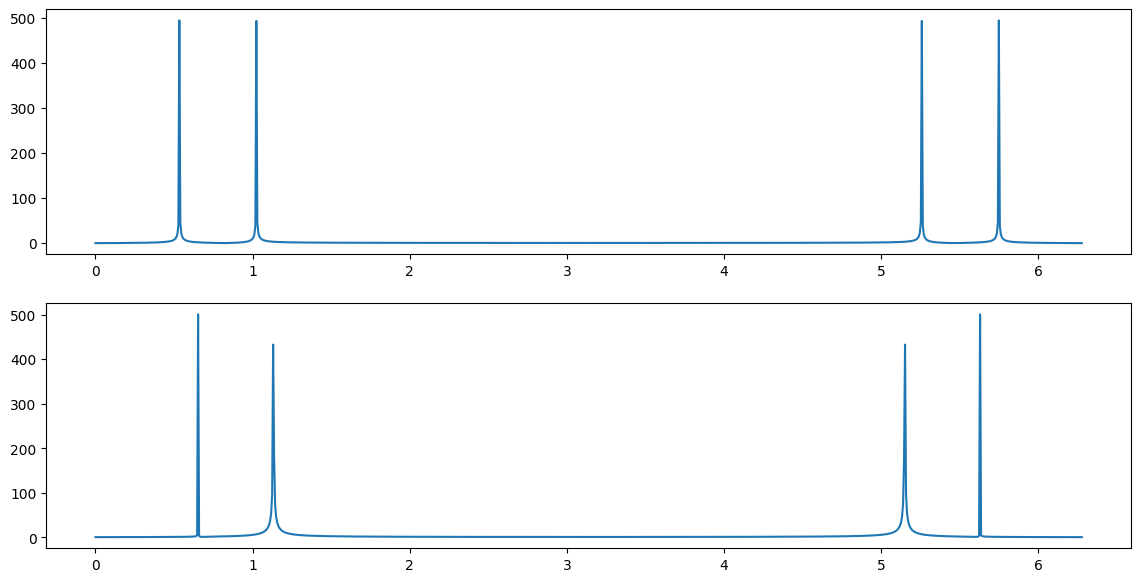

In [43]:
nf = 1000
d2fft = fft(d[2], nf)
print(d2fft)
d9fft = fft(d[9], nf)
fig = plt.figure()
ax1, ax2 = fig.subplots(nrows=2, ncols=1)
w = np.linspace(0, 2 * np.pi, nf, endpoint=False)
ax1.plot(w, np.abs(d2fft))
ax2.plot(w, np.abs(d9fft));

In [44]:
def phone_to_sound(phone):
    zeros = np.zeros(100)
    out = list()
    for num in str(phone):
        out.append(d[int(num)])
        out.append(zeros)
    return np.hstack(out)

def local_write_audio(path, audio, sampling_frequency):
    out = db_amp_change(audio, -20)
    write_audio(sampling_frequency, out, 32768, path)

sampling_frequency = 8192
local_write_audio(get_output_resources_path('task0506_phone.wav'), phone_to_sound(5557319), sampling_frequency)

# Задание 2в

In [45]:
data, _ = load_mat_file(get_resources_path('touch.mat'), ['hardx1', 'hardx2', 'x1', 'x2'])
data

{'hardx1': array([ 0.        ,  1.35684274,  1.88505139, ..., -0.16254386,
         0.01316286, -0.19358467]),
 'hardx2': array([ 0.        ,  0.        ,  0.        , ..., -0.71826987,
        -1.76229685, -1.46576208]),
 'x1': array([ 0.        ,  1.35684274,  1.88505139, ..., -0.16254386,
         0.01316286, -0.19358467]),
 'x2': array([ 0.        ,  1.36404826,  1.76444834, ..., -0.71826987,
        -1.76229685, -1.46576208])}

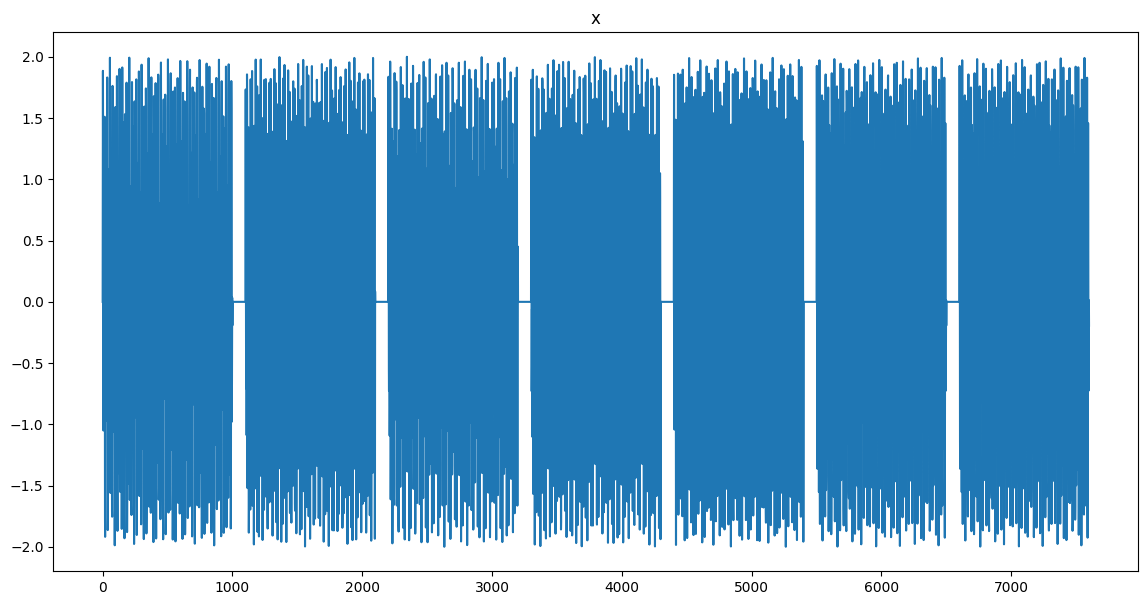

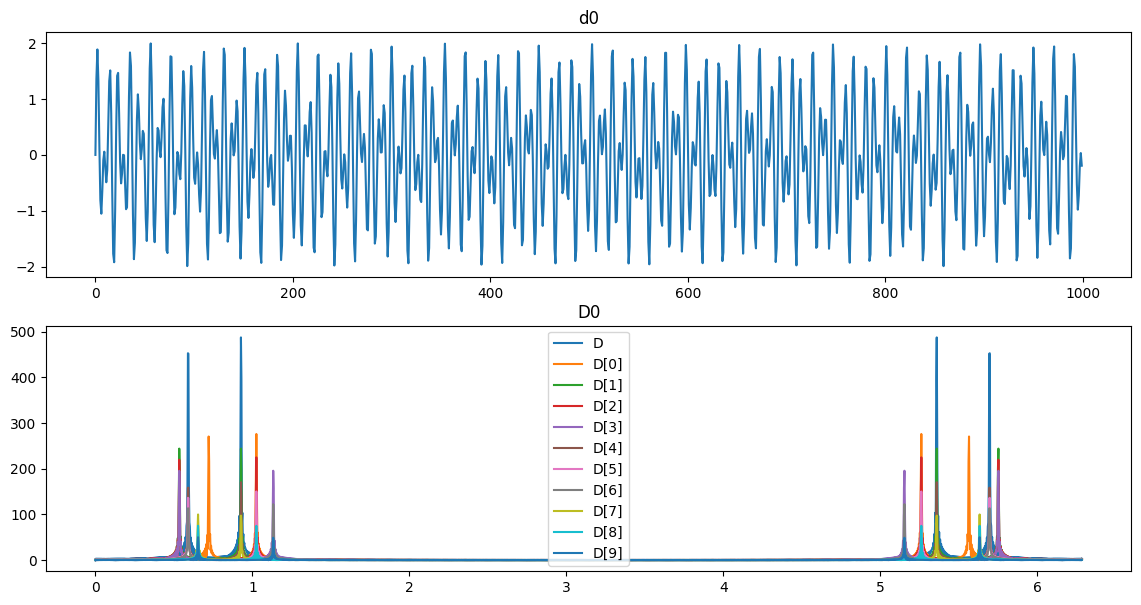

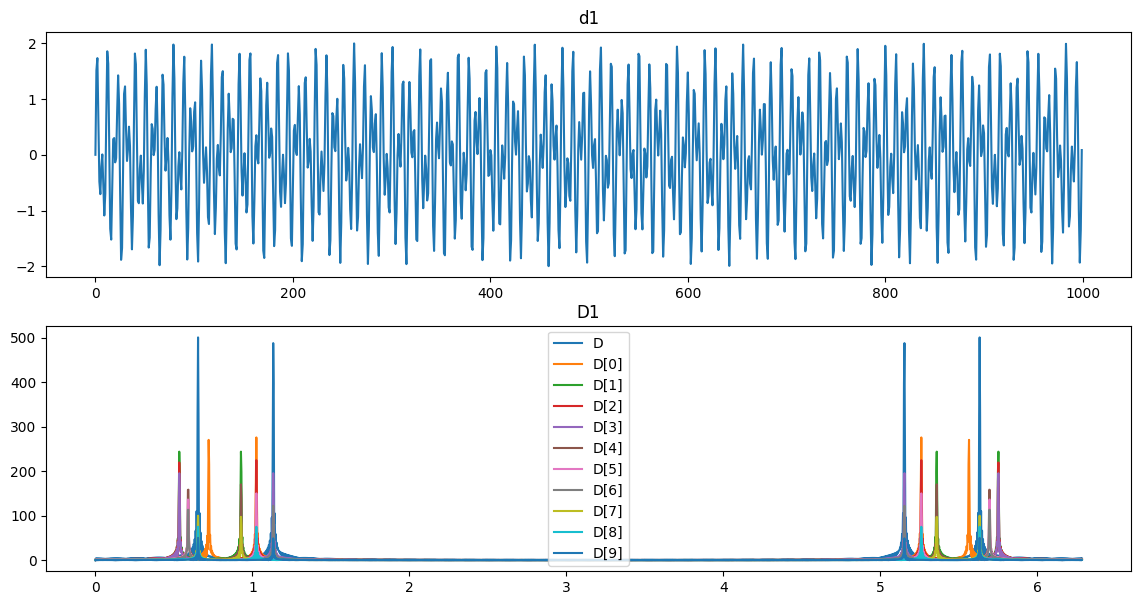

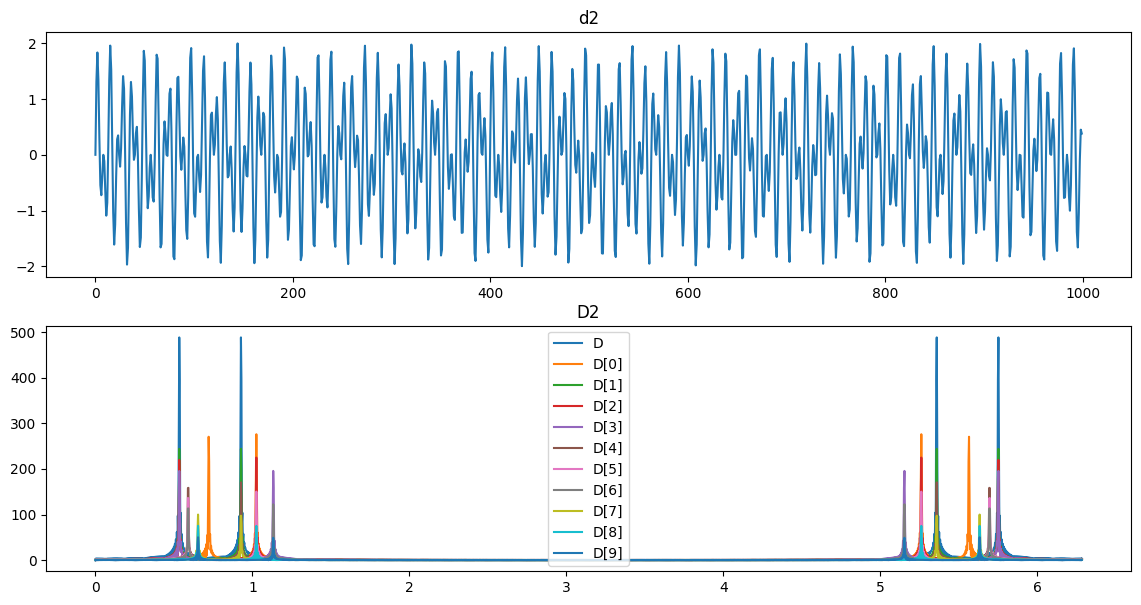

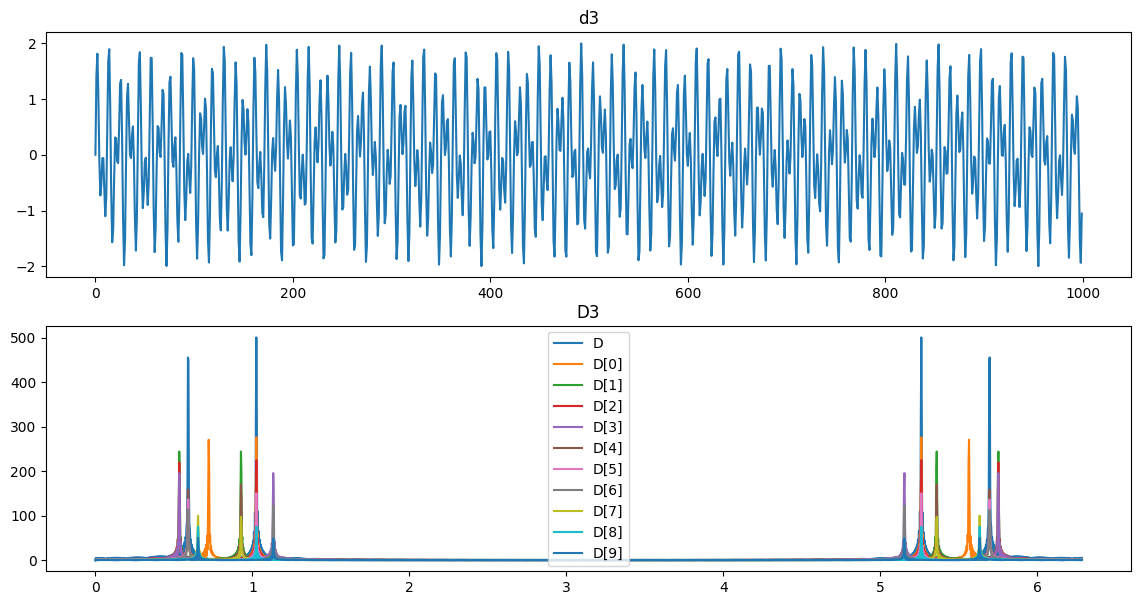

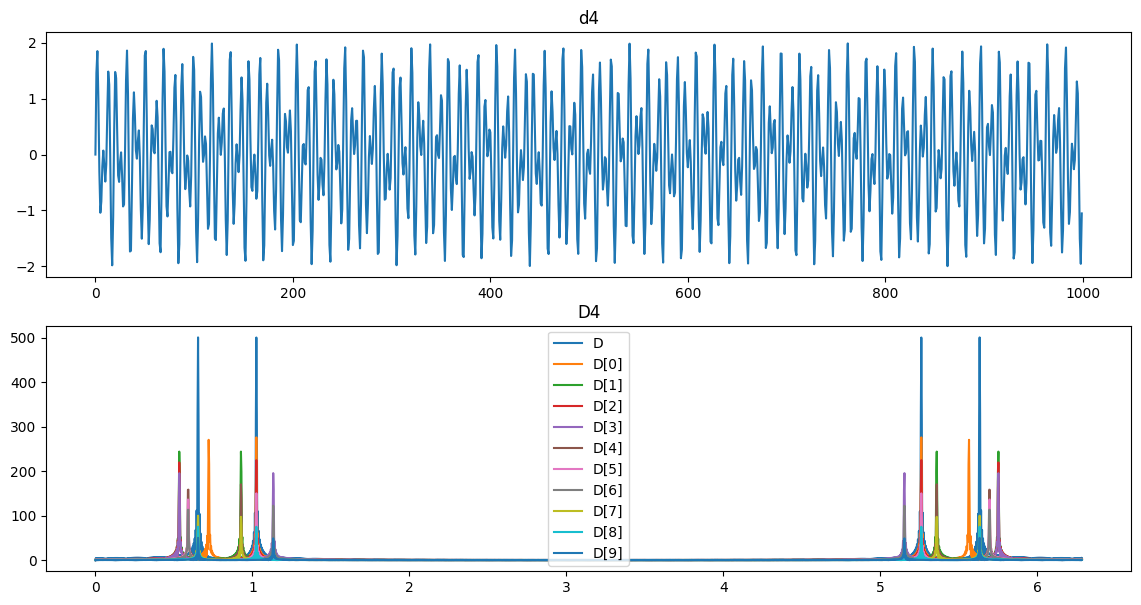

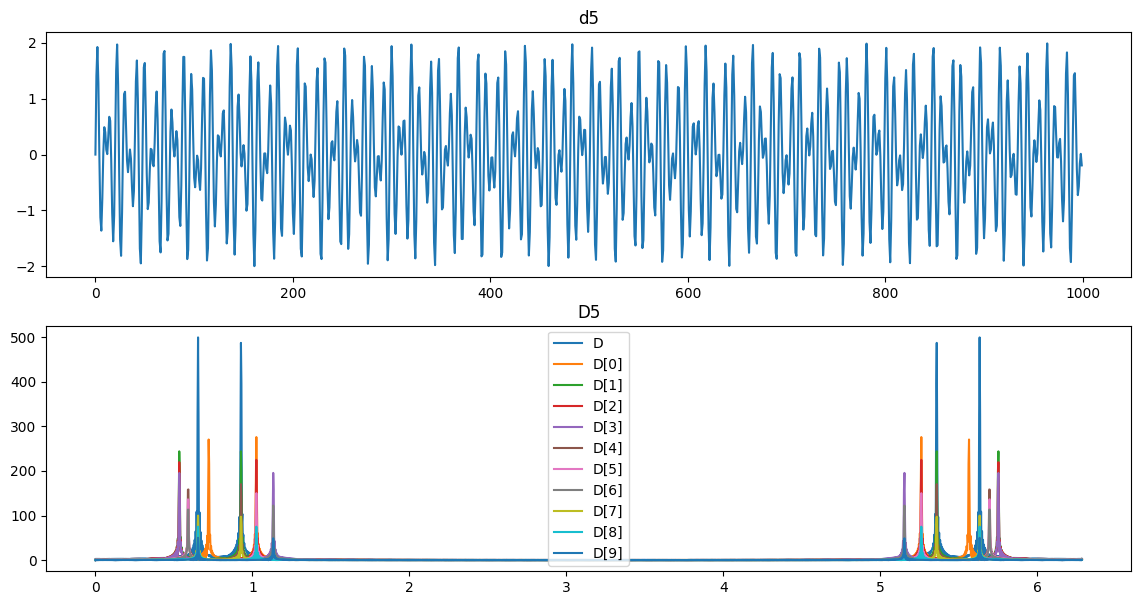

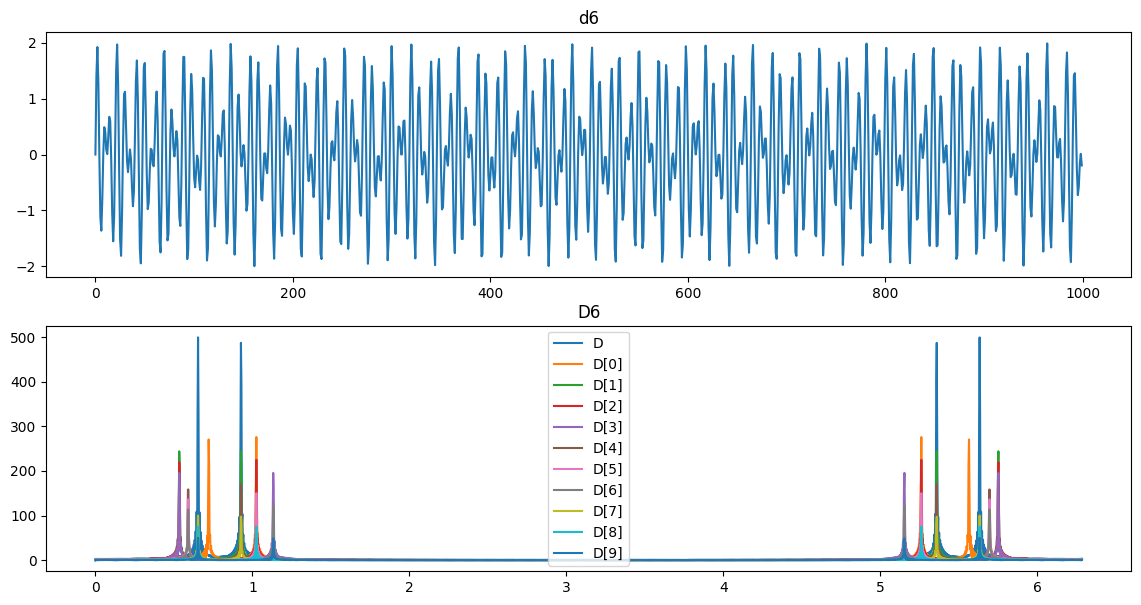

In [46]:
def show_digits_on_graph(sound_data, digit_len=1000, space_len=100, fft_a=2048):
    ax1 = plt.figure(1).add_subplot(1, 1, 1)
    ax1.plot(np.arange(len(sound_data)), sound_data)
    ax1.set_title('x')
    figsize(14, 7)
    for index, block_start in enumerate(range(0, sound_data.shape[0], digit_len + space_len)):
        block = sound_data[block_start:block_start + digit_len]
        fft_app = fft(block, fft_a)
        axes = plt.figure(index + 2).subplots(nrows=2, ncols=1)
        axes[0].plot(np.arange(1000), block)
        axes[0].set_title(f'd{index}')
        axes[1].plot(np.linspace(0, 2 * np.pi, fft_a), np.abs(fft_app), label='D')
        for j, j_data in enumerate(d):
            axes[1].plot(np.linspace(0, 2 * np.pi, fft_a), np.abs(fft(j_data, fft_a)) * 0.5 * (10 - j + 1) / 10, label=f'D[{j}]')
        axes[1].set_title(f'D{index}')
        axes[1].legend(loc='center')

show_digits_on_graph(data['x1'])

Первый номер - 4915877, $4+9+1+5+8+7+7=41$

# Задание 3а

In [47]:
wr = [0.7217, 0.5346, 0.5346, 0.5346, 0.5906, 0.5906, 0.5906, 0.6535, 0.6535, 0.6535]
wr_k = list()
w = np.linspace(0, 2 * np.pi, 2048, endpoint=False)
for wf in wr:
    k_max = 0
    k_max_value = float('+inf')
    for k, v in enumerate(w):
        value = abs(v - wf)
        if value < k_max_value:
            k_max_value = value
            k_max = k
    wr_k.append(k_max)
print(wr)
print(wr_k)


[0.7217, 0.5346, 0.5346, 0.5346, 0.5906, 0.5906, 0.5906, 0.6535, 0.6535, 0.6535]
[235, 174, 174, 174, 193, 193, 193, 213, 213, 213]


In [48]:
wc = [1.0247, 0.9273, 1.0247, 1.1328, 0.9273, 1.0247, 1.1328, 0.9273, 1.0247, 1.1328]
wc_k = list()
w = np.linspace(0, 2 * np.pi, 2048, endpoint=False)
for wf in wc:
    k_max = 0
    k_max_value = float('+inf')
    for k, v in enumerate(w):
        value = abs(v - wf)
        if value < k_max_value:
            k_max_value = value
            k_max = k
    wc_k.append(k_max)
print(wc)
print(wc_k)

[1.0247, 0.9273, 1.0247, 1.1328, 0.9273, 1.0247, 1.1328, 0.9273, 1.0247, 1.1328]
[334, 302, 334, 369, 302, 334, 369, 302, 334, 369]


# Задание 3б

In [49]:
def decode(sound):
    sound = np.abs(fft(sound, 2048)) ** 2
    wr_max = 0
    wr_max_value = 0
    for w, k in zip(wr, wr_k):
        value = sound[k]
        if value > wr_max_value:
            wr_max_value = value
            wr_max = w
    wc_max = 0
    wc_max_value = 0
    for w, k in zip(wc, wc_k):
        value = sound[k]
        if value > wc_max_value:
            wc_max_value = value
            wc_max = w
    print(wr_max, wc_max)
    for i, (wrv, wcv) in enumerate(zip(wr, wc)):
        if abs(wrv - wr_max) < 0.0001 and abs(wcv - wc_max) < 0.0001:
            return i
    return -1

for i in range(10):
    print(decode(d[i]))

0.7217 1.0247
0
0.5346 0.9273
1
0.5346 1.0247
2
0.5346 1.1328
3
0.5906 0.9273
4
0.5906 1.0247
5
0.5906 1.1328
6
0.6535 0.9273
7
0.6535 1.0247
8
0.6535 1.1328
9


# Задание 4в

In [51]:
def decode_digits(sound_data, digit_len=1000, space_len=100):
    out = list()
    for index, block_start in enumerate(range(0, sound_data.shape[0], digit_len + space_len)):
        block = sound_data[block_start:block_start + digit_len]
        digit = decode(block)
        out.append(digit)
    return out

decode_digits(data['x1']), decode_digits(data['x2'])

0.5906 0.9273
0.6535 1.1328
0.5346 0.9273
0.5906 1.0247
0.6535 1.0247
0.6535 0.9273
0.6535 0.9273
0.5346 1.0247
0.5906 1.0247
0.5346 1.1328
0.5346 0.9273
0.7217 1.0247
0.7217 1.0247
0.7217 1.0247


([4, 9, 1, 5, 8, 7, 7], [2, 5, 3, 1, 0, 0, 0])

In [55]:
def split_blocks(sound_data):
    block_start = 0
    zeros_from = -1
    zeros_count = 0
    state = 'data'
    for i, d in enumerate(sound_data):
        if state == 'data':
            if d != 0:
                zeros_count = 0
                zeros_from = -1
            elif zeros_from == -1:
                zeros_count = 1
                zeros_from = i
            elif zeros_count + 1 == 100:
                state = 'gap'
                yield sound_data[block_start:zeros_from]
            else:
                zeros_count += 1
        elif state == 'gap':
            if d != 0:
                state = 'data'
                block_start = i
                zeros_count = 0
                zeros_from = -1
    if state == 'data':
        yield sound_data[block_start:]

print(*map(lambda x: x.shape[0], split_blocks(data['x1'])))

1000 999 999 999 999 999 999


In [56]:
def decode_digits_noisy(sound_data):
    out = list()
    for block in split_blocks(sound_data):
        digit = decode(block)
        out.append(digit)
    return out

print(decode_digits_noisy(data['x1']))
print(decode_digits_noisy(data['hardx1']))

0.5906 0.9273
0.6535 1.1328
0.5346 0.9273
0.5906 1.0247
0.6535 1.0247
0.6535 0.9273
0.6535 0.9273
[4, 9, 1, 5, 8, 7, 7]
0.5906 0.9273
0.6535 1.1328
0.5346 0.9273
0.5906 1.0247
0.6535 1.0247
0.6535 0.9273
0.6535 0.9273
[4, 9, 1, 5, 8, 7, 7]
